In [1]:
# Import necessary libraries
from copy import deepcopy
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv") 
df.drop('Id',axis=1,inplace=True)
#removing un-necessary values

In [3]:
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes

In [4]:
data = df.values[:, 0:4]
category = df.values[:, 4]

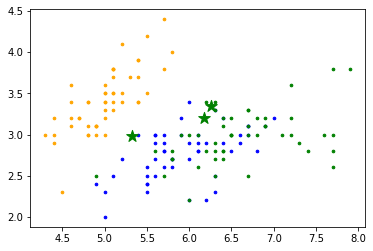

In [5]:
k = 3
n = data.shape[0]
c = data.shape[1]


mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean


colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

improving the model by updating the centre with mean of the clusters closest distances

In [6]:
old_centre = np.zeros(centers.shape)
new_centre = deepcopy(centers) 

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(new_centre - old_centre)


while error != 0:
    
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
  
    clusters = np.argmin(distances, axis = 1)
    
    old_centre = deepcopy(new_centre)

    for i in range(k):
        new_centre[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(new_centre - old_centre)
new_centre   

array([[6.35934066, 2.91208791, 5.04395604, 1.73296703],
       [5.08809524, 3.49285714, 1.45952381, 0.25      ],
       [4.94705882, 2.72941176, 2.55882353, 0.68235294]])

removing old centres and adding new centres

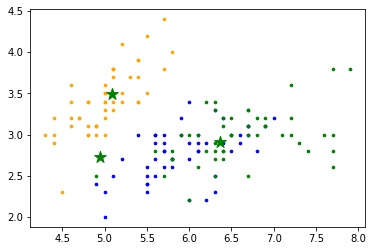

In [9]:

colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(new_centre[:,0], new_centre[:,1], marker='*', c='g', s=150)

# Thank You